## Trabalho Análise de Modelos Preditivos com Sklearn

Aluno: Leonardo Henrique de Figueiredo

Modelo de Regressao - Random Forest

Utilizando o dataset do Kaggle:

engine-type-project-dataset
Three tables containing info on different engine types in 19 different countries

https://www.kaggle.com/datasets/jeffersongalvez/enginetypeprojectdataset



In [1]:
# Importa as bibliotecas
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#import seaborn as sns
#import matplotlib.pyplot as plt

In [2]:
#instalacao do kaggle
#Install kaggle
#pip install kaggle

In [3]:
#importando biblioteca kaggle para utilizacao de API do site
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [4]:
#Autenticacao e download de dataset
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# downloading from https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset
# there are two files, train.tsv.zip and test.tsv.zip
# we write to the current directory with './'
!kaggle datasets download -d geoffnel/evs-one-electric-vehicle-dataset

evs-one-electric-vehicle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#Descompactando arquivo
import zipfile

with zipfile.ZipFile('/home/sklearn/Trabalho/evs-one-electric-vehicle-dataset.zip', 'r') as zipref:
    zipref.extractall('/home/sklearn/Trabalho/evs-one-electric-vehicle-dataset')

In [2]:
#Leitura de dataframe --- alterado nome e caminho para sua avaliacao 
#df = pd.read_csv("/home/sklearn/Trabalho/evs-one-electric-vehicle-dataset/ElectricCarData_Norm.csv", header=0)
df = pd.read_csv("/home/Trabalho/pasta_dataset1/dataset1.csv", header=0)

In [159]:
df.shape

(103, 14)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [161]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [162]:
#Ajustes nos nomes das colunas
df = df.rename(columns={'Accel': 'Accel_sec', 'TopSpeed': 'TopSpeed_km/h', 'Range': 'Range_km/h', 'Efficiency': 'Efficiency_Wh/km'})
df = df.replace(' sec', '', regex=True)
df = df.replace(' km/h', '', regex=True)
df = df.replace(' km', '', regex=True)
df = df.replace(' Wh/km', '', regex=True)

In [163]:
df.head()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [164]:
(df['FastCharge'].eq('-')).any()
df=df.replace(to_replace="-",value=0)

In [165]:
#Alteracao de tipo de dados
df[['Accel_sec', 'TopSpeed_km/h', 'Range_km/h','Efficiency_Wh/km','FastCharge']] = df[['Accel_sec', 'TopSpeed_km/h', 'Range_km/h','Efficiency_Wh/km','FastCharge']].astype(float)

In [166]:
#encontrando a media na coluna TopSpeep
df2 = df['TopSpeed_km/h'].mean()
print(df2)

179.19417475728156


In [167]:
df['TopSpeed_km/h']

0      233.0
1      160.0
2      210.0
3      180.0
4      145.0
       ...  
98     160.0
99     210.0
100    200.0
101    200.0
102    190.0
Name: TopSpeed_km/h, Length: 103, dtype: float64

In [168]:
#Definicao de parametro - para valores em topspeed > media = 1   Para valores em topspeed < media = 0
df['TopSpeed_km/h'].values[df['TopSpeed_km/h'].values < df['TopSpeed_km/h'].mean()] = 0
df['TopSpeed_km/h'].values[df['TopSpeed_km/h'].values > df['TopSpeed_km/h'].mean()] = 1

In [169]:
#Definicao de parametro - para valores em Efficiency > media = 1   para valores em Efficiency < media = 0 
df['Efficiency_Wh/km'].values[df['Efficiency_Wh/km'].values < df['Efficiency_Wh/km'].mean()] = 0
df['Efficiency_Wh/km'].values[df['Efficiency_Wh/km'].values > df['Efficiency_Wh/km'].mean()] = 1

In [170]:
df = df.drop(columns=['PlugType'])

In [171]:
df = df.drop(columns=['Segment'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             103 non-null    object 
 1   Model             103 non-null    object 
 2   Accel_sec         103 non-null    float64
 3   TopSpeed_km/h     103 non-null    float64
 4   Range_km/h        103 non-null    float64
 5   Efficiency_Wh/km  103 non-null    float64
 6   FastCharge        103 non-null    float64
 7   RapidCharge       103 non-null    object 
 8   PowerTrain        103 non-null    object 
 9   BodyStyle         103 non-null    object 
 10  Seats             103 non-null    int64  
 11  PriceEuro         103 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 9.8+ KB


In [173]:
df.head()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,1.0,450.0,0.0,940.0,Rapid charging possible,All Wheel Drive,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,0.0,270.0,0.0,250.0,Rapid charging possible,Rear Wheel Drive,Hatchback,5,30000
2,Polestar,2,4.7,1.0,400.0,0.0,620.0,Rapid charging possible,All Wheel Drive,Liftback,5,56440
3,BMW,iX3,6.8,1.0,360.0,1.0,560.0,Rapid charging possible,Rear Wheel Drive,SUV,5,68040
4,Honda,e,9.5,0.0,170.0,0.0,190.0,Rapid charging possible,Rear Wheel Drive,Hatchback,4,32997


In [174]:
df[['Brand','TopSpeed_km/h','Efficiency_Wh/km','PriceEuro', 'RapidCharge']].head()

,Brand,TopSpeed_km/h,Efficiency_Wh/km,PriceEuro,RapidCharge
0,Tesla,1.0,0.0,55480,Rapid charging possible
1,Volkswagen,0.0,0.0,30000,Rapid charging possible
2,Polestar,1.0,0.0,56440,Rapid charging possible
3,BMW,1.0,1.0,68040,Rapid charging possible
4,Honda,0.0,0.0,32997,Rapid charging possible


In [175]:
#transformando para object o tipo 
df.dtypes.loc[df.dtypes=="object"]  

Brand          object
Model          object
RapidCharge    object
PowerTrain     object
BodyStyle      object
dtype: object

In [176]:
df.Brand.unique()

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

In [177]:
df['Brand'] = df['Brand'].replace(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ','Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ', 'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ', 'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ', 'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ', 'Sono ', 'Smart ', 'Fiat '], \
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'])

In [178]:
df.head(10)

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,0,Model 3 Long Range Dual Motor,4.6,1.0,450.0,0.0,940.0,Rapid charging possible,All Wheel Drive,Sedan,5,55480
1,1,ID.3 Pure,10.0,0.0,270.0,0.0,250.0,Rapid charging possible,Rear Wheel Drive,Hatchback,5,30000
2,2,2,4.7,1.0,400.0,0.0,620.0,Rapid charging possible,All Wheel Drive,Liftback,5,56440
3,3,iX3,6.8,1.0,360.0,1.0,560.0,Rapid charging possible,Rear Wheel Drive,SUV,5,68040
4,4,e,9.5,0.0,170.0,0.0,190.0,Rapid charging possible,Rear Wheel Drive,Hatchback,4,32997
5,5,Air,2.8,1.0,610.0,0.0,620.0,Rapid charging possible,All Wheel Drive,Sedan,5,105000
6,1,e-Golf,9.6,0.0,190.0,0.0,220.0,Rapid charging possible,Front Wheel Drive,Hatchback,5,31900
7,6,e-208,8.1,0.0,275.0,0.0,420.0,Rapid charging possible,Front Wheel Drive,Hatchback,5,29682
8,0,Model 3 Standard Range Plus,5.6,1.0,310.0,0.0,650.0,Rapid charging possible,Rear Wheel Drive,Sedan,5,46380
9,7,Q4 e-tron,6.3,1.0,400.0,1.0,540.0,Rapid charging possible,All Wheel Drive,SUV,5,55000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             103 non-null    object 
 1   Model             103 non-null    object 
 2   Accel_sec         103 non-null    float64
 3   TopSpeed_km/h     103 non-null    float64
 4   Range_km/h        103 non-null    float64
 5   Efficiency_Wh/km  103 non-null    float64
 6   FastCharge        103 non-null    float64
 7   RapidCharge       103 non-null    object 
 8   PowerTrain        103 non-null    object 
 9   BodyStyle         103 non-null    object 
 10  Seats             103 non-null    int64  
 11  PriceEuro         103 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 9.8+ KB


In [180]:
df.BodyStyle.unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [181]:
df['BodyStyle'] = df['BodyStyle'].replace(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio','SPV', 'Station'],['0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [182]:
df1 = df

In [183]:
df1.tail()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
98,9,Ariya 63kWh,7.5,0.0,330.0,1.0,440.0,Rapid charging possible,Front Wheel Drive,1,5,45000
99,7,e-tron S Sportback 55 quattro,4.5,1.0,335.0,1.0,540.0,Rapid charging possible,All Wheel Drive,3,5,96050
100,9,Ariya e-4ORCE 63kWh,5.9,1.0,325.0,1.0,440.0,Rapid charging possible,All Wheel Drive,1,5,50000
101,9,Ariya e-4ORCE 87kWh Performance,5.1,1.0,375.0,1.0,450.0,Rapid charging possible,All Wheel Drive,1,5,65000
102,29,M-Byte 95 kWh 2WD,7.5,1.0,400.0,1.0,480.0,Rapid charging possible,All Wheel Drive,3,5,62000


In [184]:
# Escolher o alvo. Dividir os atributos (variáveis independentes) da target (label)
x = df1[['Brand',	'Accel_sec', 'Efficiency_Wh/km',	'TopSpeed_km/h','Range_km/h',	'FastCharge','BodyStyle',	'Seats']]
y = df1['RapidCharge']

In [185]:
# Vamos criar uma árvore de decisão
modelodt = DecisionTreeClassifier()

In [186]:
# Treina o modelo com árvore de decisão
modelodt = modelodt.fit(x, y)

In [187]:
# Aplica o modelo treinado no dataset para prever o resultado
y_previsao = modelodt.predict(x)

In [188]:
# Avalia a acurácia do modelo de árvore de decisão
metrics.accuracy_score(y, y_previsao)

1.0

In [189]:
# Análise Exploratória Inicial
df1.describe()

,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,0.446602,338.786408,0.407767,434.563107,4.883495,55811.563107
std,3.017430,0.499571,126.014444,0.493822,219.660061,0.795834,34134.665280
min,2.100000,0.000000,95.000000,0.000000,0.000000,2.000000,20129.000000
25%,5.100000,0.000000,250.000000,0.000000,260.000000,5.000000,34429.500000
50%,7.300000,0.000000,340.000000,0.000000,440.000000,5.000000,45000.000000
75%,9.000000,1.000000,400.000000,1.000000,555.000000,5.000000,65000.000000
max,22.400000,1.000000,970.000000,1.000000,940.000000,7.000000,215000.000000


<AxesSubplot:>

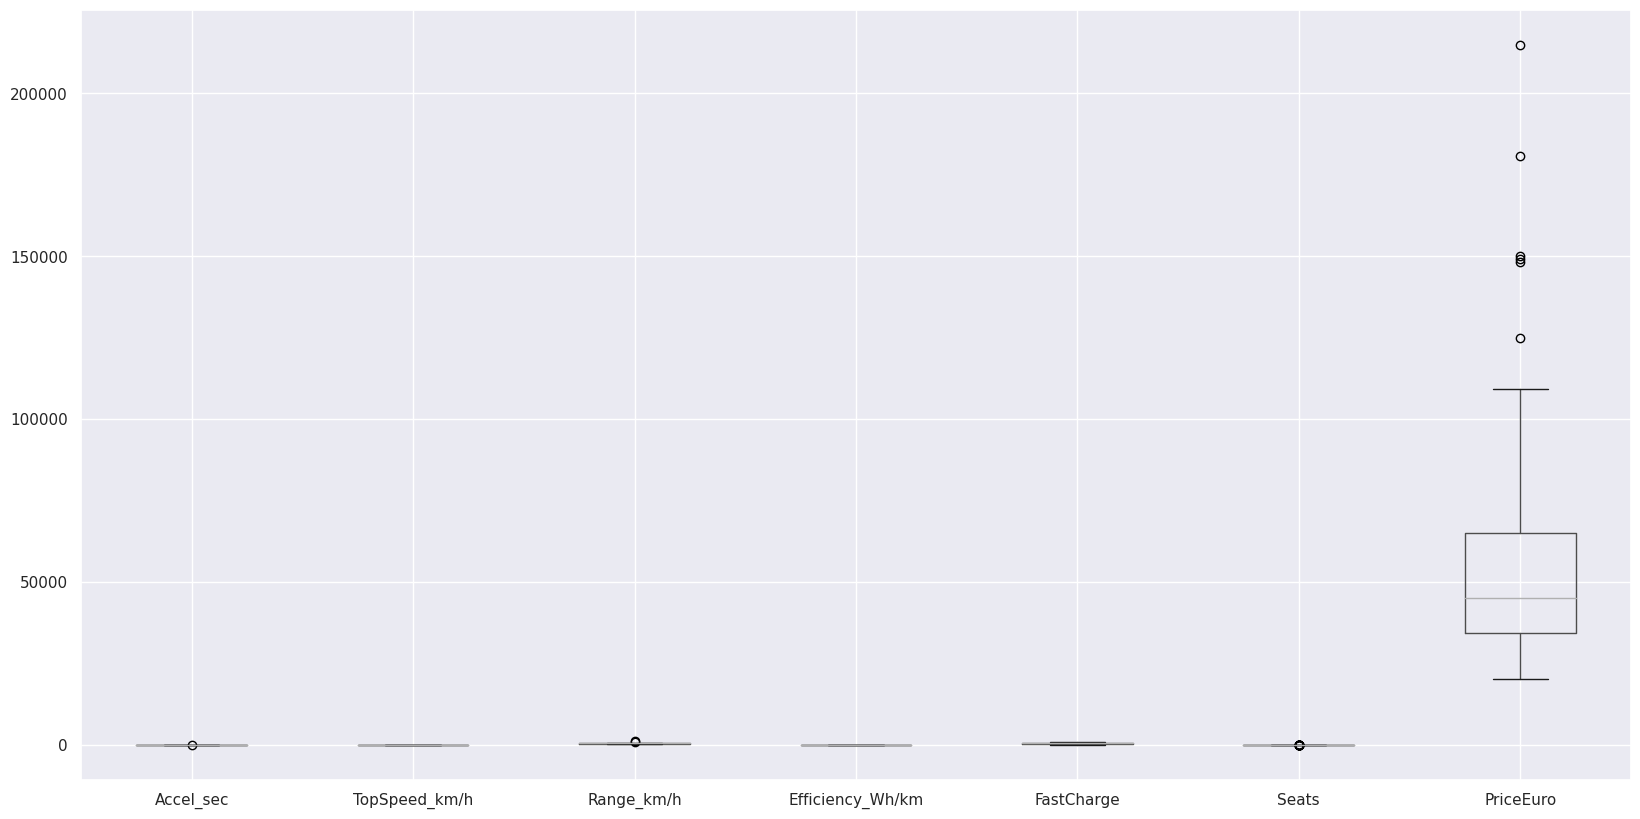

In [190]:
# Tem Outliers?
df1.boxplot()

<AxesSubplot:>

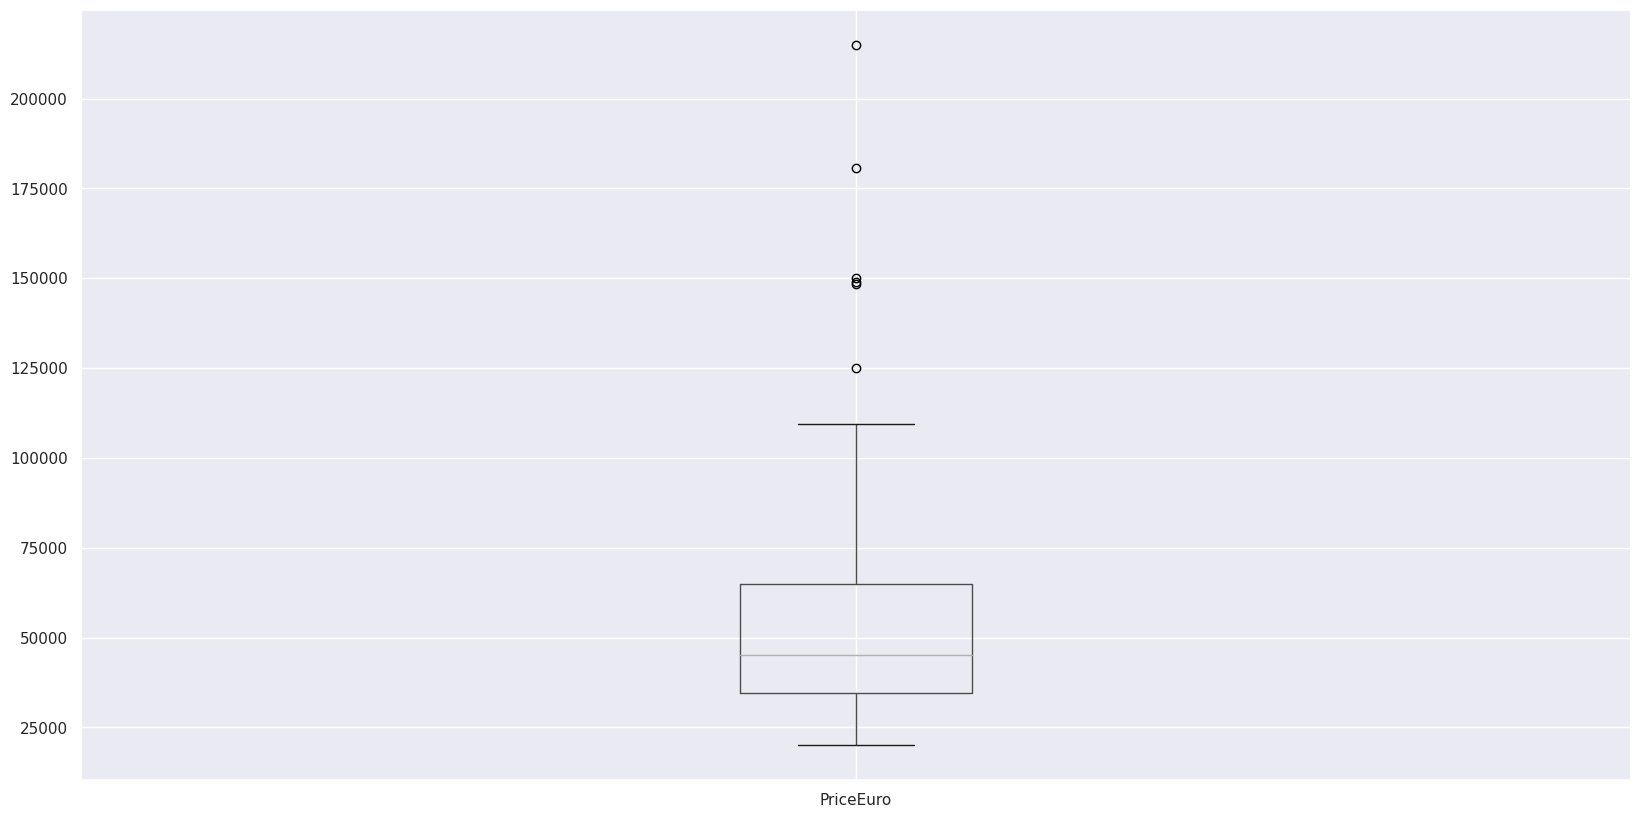

In [191]:
# Avalia um dos atributos: quantidade de gravidez
df1.boxplot('PriceEuro')

In [192]:
# Transforma test em binario: 0 - nao possivel ,   1 - possivel  
import numpy as np
df1['RapidCharge'] = pd.Series( np.where(df1.RapidCharge== 'Rapid charging possible' , 1 , 0 ) , name = 'RapidCharge' )

In [193]:
df1.head()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,0,Model 3 Long Range Dual Motor,4.6,1.0,450.0,0.0,940.0,1,All Wheel Drive,0,5,55480
1,1,ID.3 Pure,10.0,0.0,270.0,0.0,250.0,1,Rear Wheel Drive,1,5,30000
2,2,2,4.7,1.0,400.0,0.0,620.0,1,All Wheel Drive,2,5,56440
3,3,iX3,6.8,1.0,360.0,1.0,560.0,1,Rear Wheel Drive,3,5,68040
4,4,e,9.5,0.0,170.0,0.0,190.0,1,Rear Wheel Drive,1,4,32997


In [62]:
#criacao de variaveis dummie
#df = pd.get_dummies(df,columns = ['BodyStyle','RapidCharge'],drop_first = True)

In [194]:
df.head(15)

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,0,Model 3 Long Range Dual Motor,4.6,1.0,450.0,0.0,940.0,1,All Wheel Drive,0,5,55480
1,1,ID.3 Pure,10.0,0.0,270.0,0.0,250.0,1,Rear Wheel Drive,1,5,30000
2,2,2,4.7,1.0,400.0,0.0,620.0,1,All Wheel Drive,2,5,56440
3,3,iX3,6.8,1.0,360.0,1.0,560.0,1,Rear Wheel Drive,3,5,68040
4,4,e,9.5,0.0,170.0,0.0,190.0,1,Rear Wheel Drive,1,4,32997
5,5,Air,2.8,1.0,610.0,0.0,620.0,1,All Wheel Drive,0,5,105000
6,1,e-Golf,9.6,0.0,190.0,0.0,220.0,1,Front Wheel Drive,1,5,31900
7,6,e-208,8.1,0.0,275.0,0.0,420.0,1,Front Wheel Drive,1,5,29682
8,0,Model 3 Standard Range Plus,5.6,1.0,310.0,0.0,650.0,1,Rear Wheel Drive,0,5,46380
9,7,Q4 e-tron,6.3,1.0,400.0,1.0,540.0,1,All Wheel Drive,3,5,55000


In [195]:
df.describe()


,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,0.446602,338.786408,0.407767,434.563107,0.951456,4.883495,55811.563107
std,3.017430,0.499571,126.014444,0.493822,219.660061,0.215963,0.795834,34134.665280
min,2.100000,0.000000,95.000000,0.000000,0.000000,0.000000,2.000000,20129.000000
25%,5.100000,0.000000,250.000000,0.000000,260.000000,1.000000,5.000000,34429.500000
50%,7.300000,0.000000,340.000000,0.000000,440.000000,1.000000,5.000000,45000.000000
75%,9.000000,1.000000,400.000000,1.000000,555.000000,1.000000,5.000000,65000.000000
max,22.400000,1.000000,970.000000,1.000000,940.000000,1.000000,7.000000,215000.000000


In [196]:
dfcars = df

In [197]:
dfcars.head()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,0,Model 3 Long Range Dual Motor,4.6,1.0,450.0,0.0,940.0,1,All Wheel Drive,0,5,55480
1,1,ID.3 Pure,10.0,0.0,270.0,0.0,250.0,1,Rear Wheel Drive,1,5,30000
2,2,2,4.7,1.0,400.0,0.0,620.0,1,All Wheel Drive,2,5,56440
3,3,iX3,6.8,1.0,360.0,1.0,560.0,1,Rear Wheel Drive,3,5,68040
4,4,e,9.5,0.0,170.0,0.0,190.0,1,Rear Wheel Drive,1,4,32997


In [198]:
dfcars.corr()

,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,Seats,PriceEuro
Accel_sec,1.000000,-0.730512,-0.677062,-0.329217,-0.782324,-0.514820,-0.175335,-0.627174
TopSpeed_km/h,-0.730512,1.000000,0.556097,0.605750,0.679001,0.202915,0.230791,0.606773
Range_km/h,-0.677062,0.556097,1.000000,0.314458,0.750859,0.401290,0.300163,0.674844
Efficiency_Wh/km,-0.329217,0.605750,0.314458,1.000000,0.311666,0.095498,0.221853,0.492643
FastCharge,-0.782324,0.679001,0.750859,0.311666,1.000000,0.449047,0.262732,0.658882
RapidCharge,-0.514820,0.202915,0.401290,0.095498,0.449047,1.000000,0.423111,0.197208
Seats,-0.175335,0.230791,0.300163,0.221853,0.262732,0.423111,1.000000,0.020920
PriceEuro,-0.627174,0.606773,0.674844,0.492643,0.658882,0.197208,0.020920,1.000000


<AxesSubplot:>

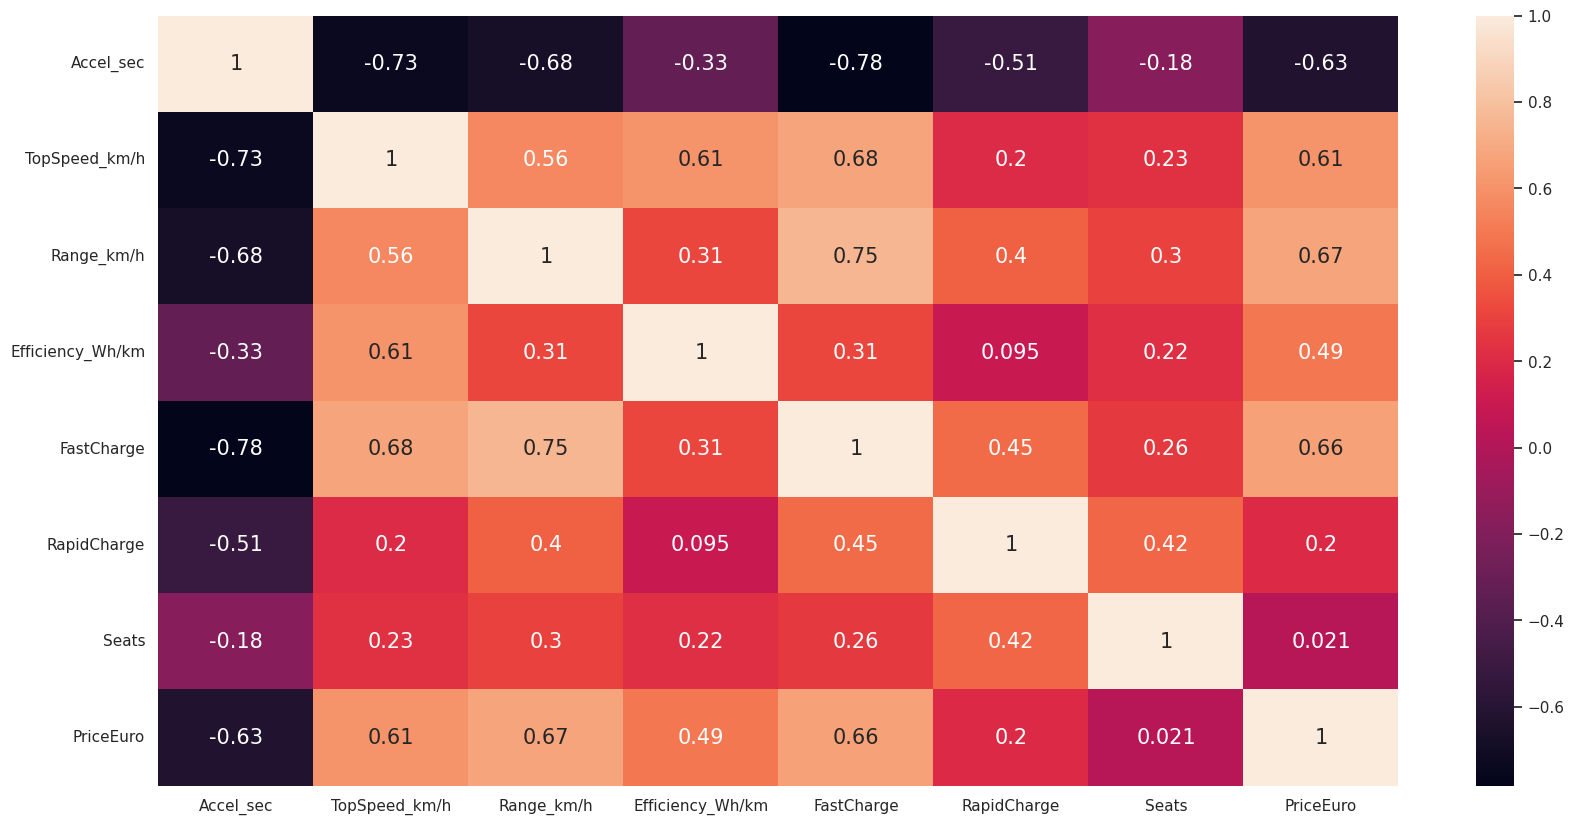

In [199]:
# Visualiza a Correlação
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(dfcars.corr(), annot=True, annot_kws={"size": 15})

In [200]:
dfcars.columns!="Efficiency_Wh/km"

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [201]:
dfcars.head()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km/h,Efficiency_Wh/km,FastCharge,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,0,Model 3 Long Range Dual Motor,4.6,1.0,450.0,0.0,940.0,1,All Wheel Drive,0,5,55480
1,1,ID.3 Pure,10.0,0.0,270.0,0.0,250.0,1,Rear Wheel Drive,1,5,30000
2,2,2,4.7,1.0,400.0,0.0,620.0,1,All Wheel Drive,2,5,56440
3,3,iX3,6.8,1.0,360.0,1.0,560.0,1,Rear Wheel Drive,3,5,68040
4,4,e,9.5,0.0,170.0,0.0,190.0,1,Rear Wheel Drive,1,4,32997


In [72]:
#dfcars['Brand'] = dfcars['Brand'].replace(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ','Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ', 'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ', 'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ', 'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ', 'Sono ', 'Smart ', 'Fiat '], \
#['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'])

In [202]:
dfcars = dfcars.drop(columns=['Model'], axis=1)
dfcars = dfcars.drop(columns=['PowerTrain'], axis=1)
dfcars = dfcars.drop(columns=['RapidCharge'], axis=1)

In [203]:
X = dfcars.loc[:,dfcars.columns!="Efficiency_Wh/km"]
type(X)

pandas.core.frame.DataFrame

In [204]:
X.head()

,Brand,Accel_sec,TopSpeed_km/h,Range_km/h,FastCharge,BodyStyle,Seats,PriceEuro
0,0,4.6,1.0,450.0,940.0,0,5,55480
1,1,10.0,0.0,270.0,250.0,1,5,30000
2,2,4.7,1.0,400.0,620.0,2,5,56440
3,3,6.8,1.0,360.0,560.0,3,5,68040
4,4,9.5,0.0,170.0,190.0,1,4,32997


In [205]:
X.shape

(103, 8)

In [206]:
dfcars.PriceEuro.dtypes

dtype('int64')

In [207]:
y = dfcars["Brand"]
type(y)

pandas.core.series.Series

In [208]:
y.head()

0    0
1    1
2    2
3    3
4    4
Name: Brand, dtype: object

In [209]:
y.value_counts()

0     13
7      9
9      8
1      8
15     6
18     5
11     5
17     5
3      4
28     4
31     3
29     3
8      3
10     3
14     3
32     2
6      2
4      2
13     1
25     1
2      1
30     1
5      1
27     1
26     1
24     1
12     1
23     1
22     1
21     1
20     1
19     1
16     1
Name: Brand, dtype: int64

In [210]:
y.shape

(103,)

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [213]:
X_train.head()

,Brand,Accel_sec,TopSpeed_km/h,Range_km/h,FastCharge,BodyStyle,Seats,PriceEuro
11,9,7.9,0.0,220.0,230.0,1,5,29234
101,9,5.1,1.0,375.0,450.0,1,5,65000
55,4,8.3,0.0,170.0,190.0,1,4,35921
28,3,7.3,0.0,235.0,270.0,1,4,38017
64,28,7.0,1.0,450.0,430.0,3,5,54475


In [214]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 11 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          72 non-null     object 
 1   Accel_sec      72 non-null     float64
 2   TopSpeed_km/h  72 non-null     float64
 3   Range_km/h     72 non-null     float64
 4   FastCharge     72 non-null     float64
 5   BodyStyle      72 non-null     object 
 6   Seats          72 non-null     int64  
 7   PriceEuro      72 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ KB


In [215]:
X_train.shape

(72, 8)

In [216]:
X_test.shape

(31, 8)

In [217]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(random_state=40)

In [218]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [219]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [220]:
y_test_pred

array(['7', '0', '9', '11', '7', '0', '7', '17', '7', '0', '10', '17',
       '29', '30', '7', '6', '11', '0', '10', '1', '9', '15', '15', '17',
       '18', '9', '1', '28', '7', '7', '7'], dtype=object)

In [221]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [222]:
confusion_matrix(y_train, y_train_pred)

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4,

In [223]:
confusion_matrix(y_test, y_test_pred)

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,

In [224]:
accuracy_score(y_test, y_test_pred)

0.7096774193548387

In [225]:
pd.DataFrame({'atributo':X.columns, 'importance':clftree.feature_importances_}).sort_values('importance', ascending = False)

,atributo,importance
0,Brand,0.617921
3,Range_km/h,0.080281
1,Accel_sec,0.073439
4,FastCharge,0.072846
5,BodyStyle,0.069833
7,PriceEuro,0.051408
6,Seats,0.019584
2,TopSpeed_km/h,0.014688


In [59]:
#pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [226]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [227]:
from IPython.display import Image

In [228]:
import pydotplus

In [64]:
pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pygraphviz: filename=pygraphviz-1.10-cp310-cp310-linux_x86_64.whl size=176140 sha256=b7c969a3cb011deed136c3548a2ddc631c3dede4b1d50b8f4f65449b63f55ef4
  Stored in directory: /root/.cache/pip/wheels/e9/50/02/d9d68f6c947a928e517d5cd9af0ab007c1274fdba95fa9cbe3
Successfully built pygraphviz
Note: you may need to restart the kernel to use updated packages.


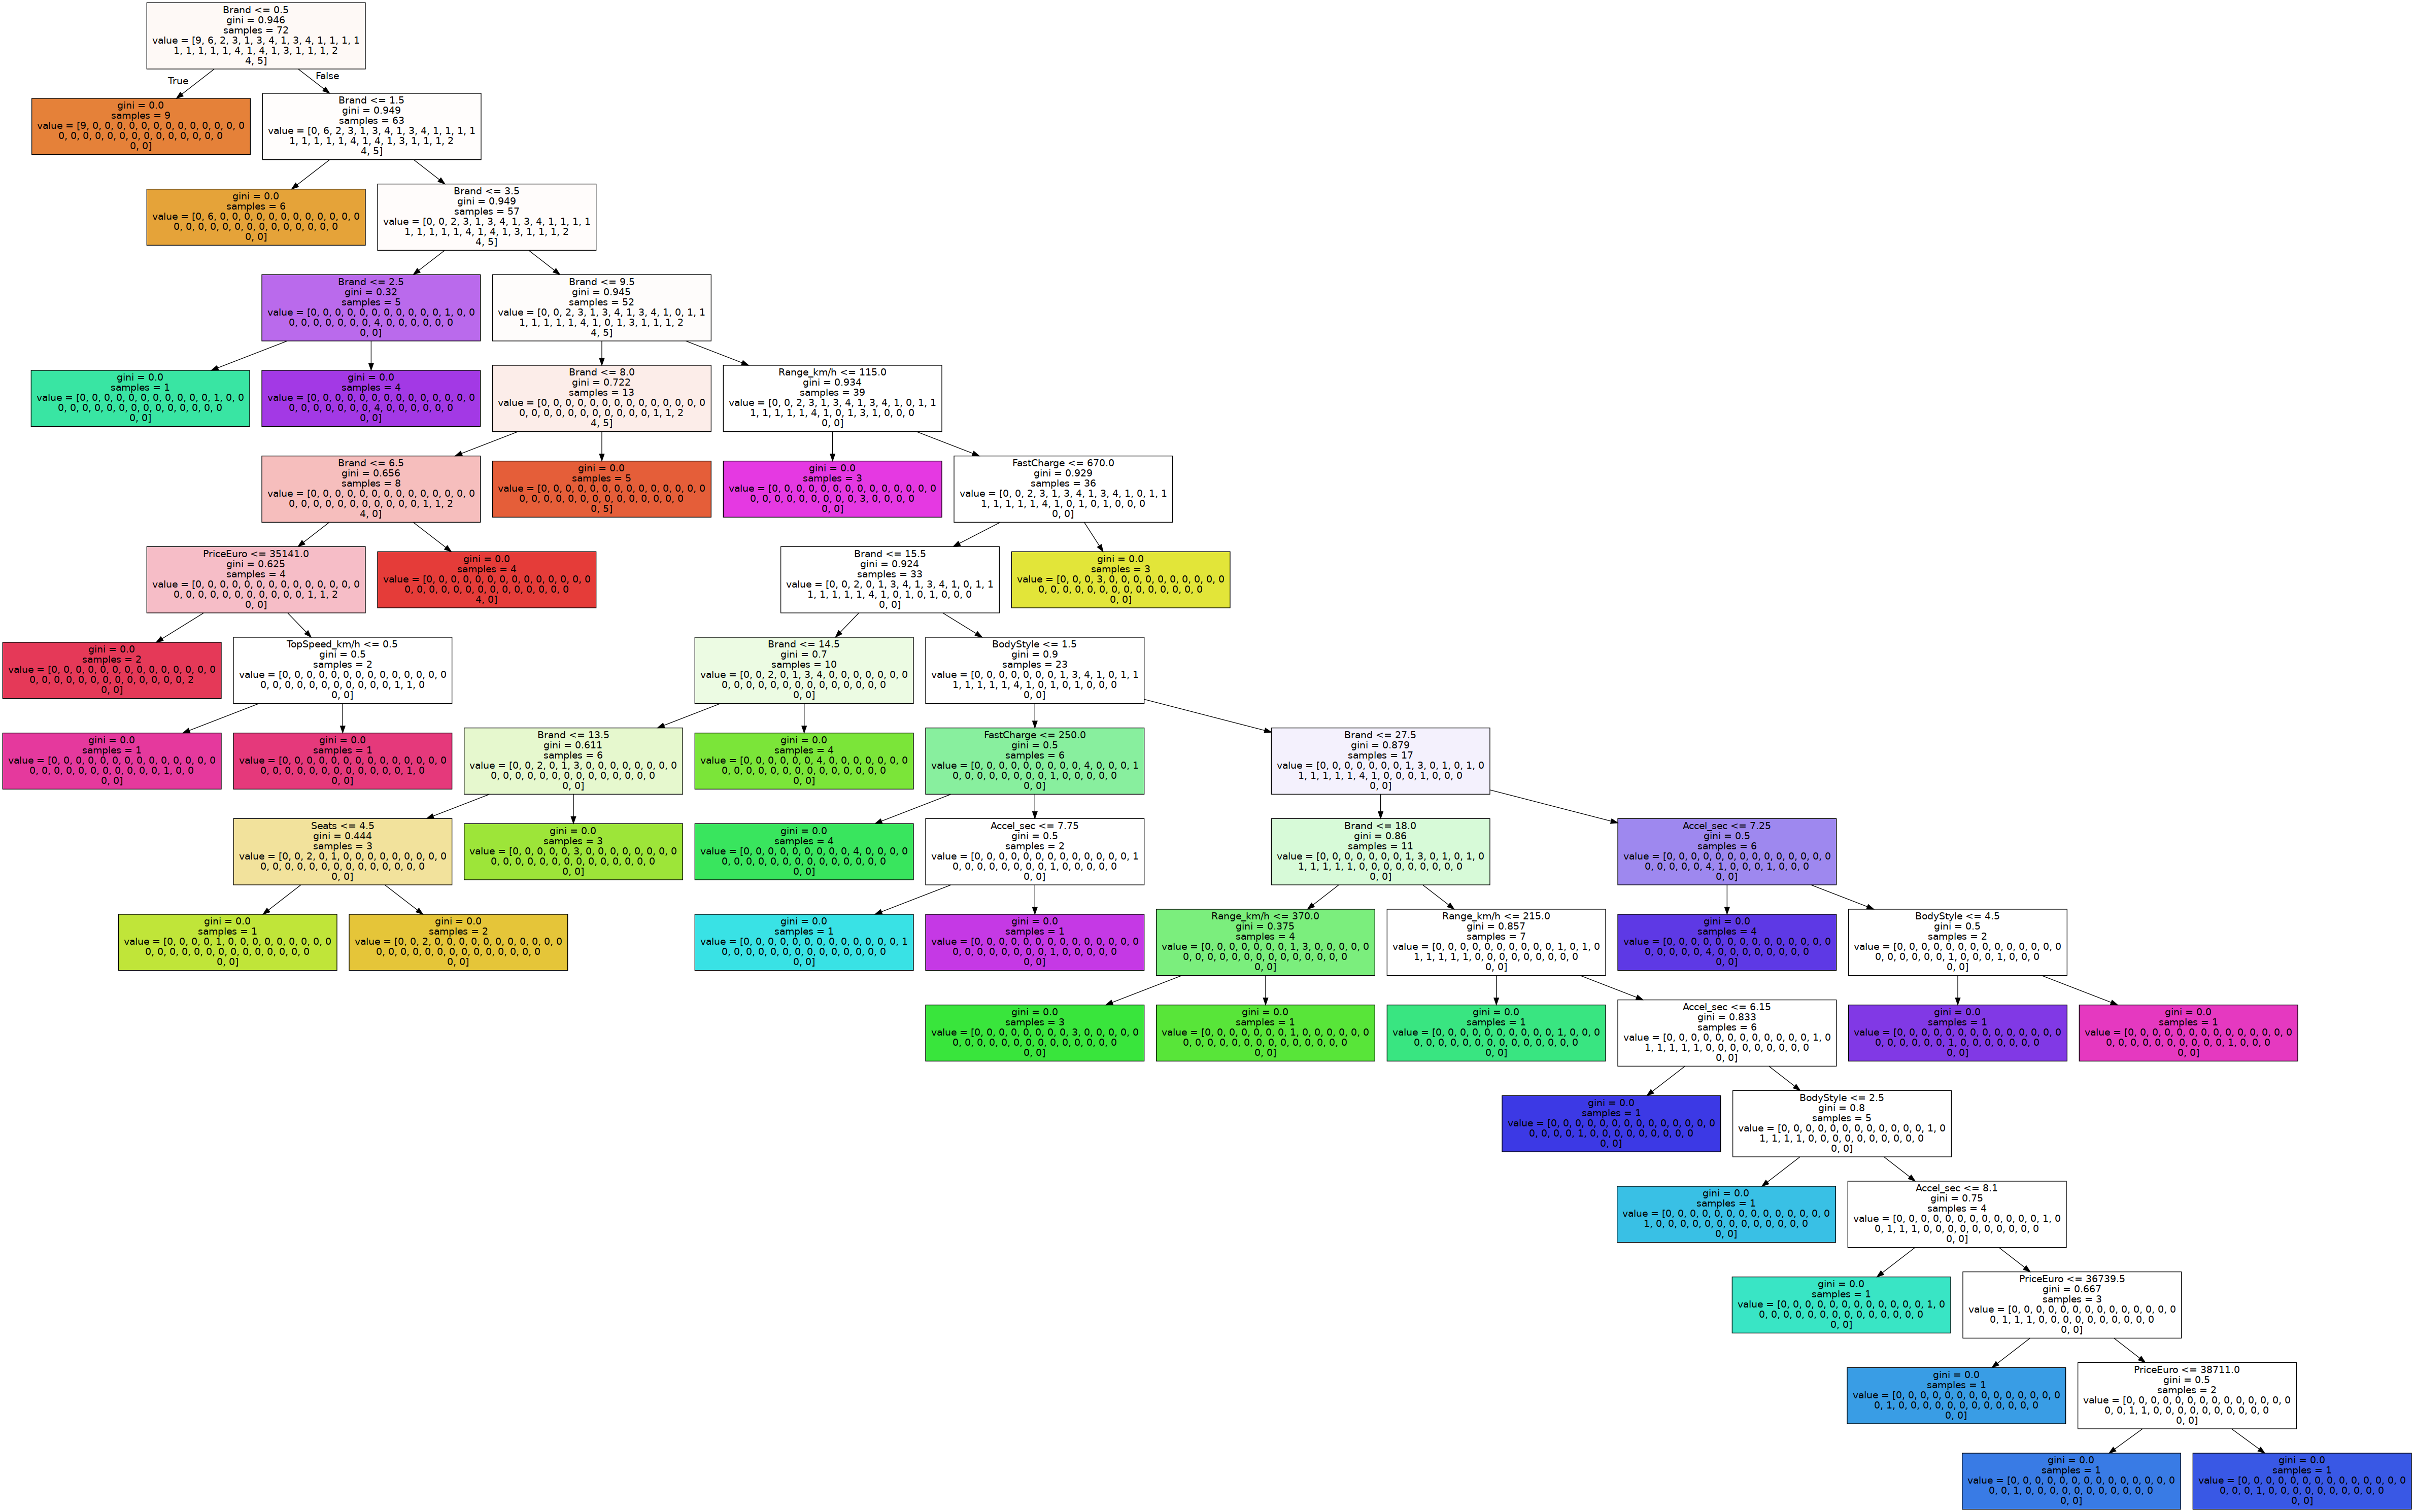

In [229]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

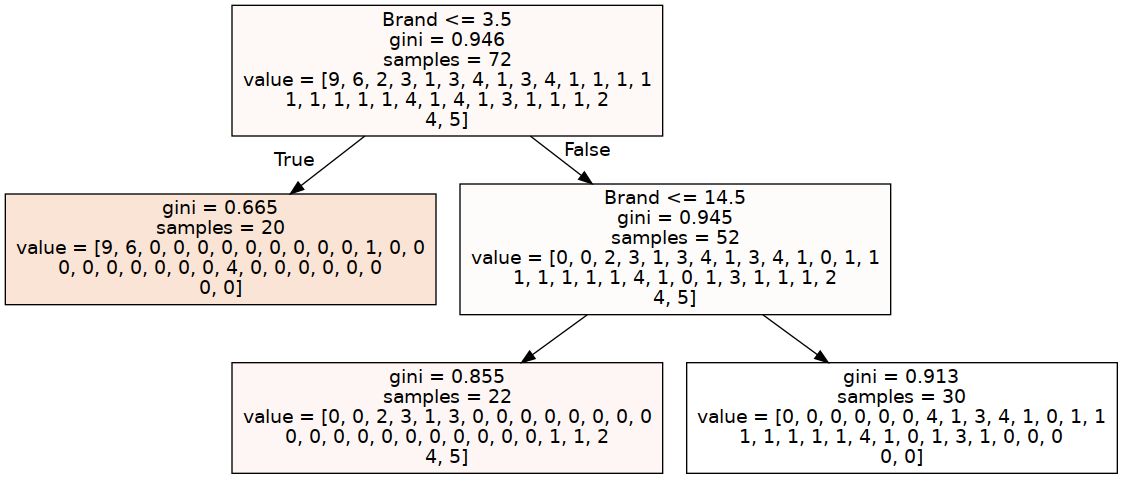

In [230]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4, random_state=40)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [231]:
accuracy_score(y_test, clftree2.predict(X_test))

0.2903225806451613

In [232]:
confusion_matrix(y_test, clftree2.predict(X_test))

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])

In [233]:
pd.DataFrame({'atributo':X.columns, 'importance':clftree2.feature_importances_}).sort_values('importance', ascending = False)

,atributo,importance
0,Brand,1.0
1,Accel_sec,0.0
2,TopSpeed_km/h,0.0
3,Range_km/h,0.0
4,FastCharge,0.0
5,BodyStyle,0.0
6,Seats,0.0
7,PriceEuro,0.0


## Exercício 10 - Otimizamos nossa árvore de decisão ajustando os hiperparâmetros usando gridsearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

Otimizamos o modelo, aplicando gridsearch com os seguintes hiperparâmetros:

```python 
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,None],
                "min_samples_split": [2, 3, 4,None]}
``` 



In [260]:
from sklearn.model_selection import GridSearchCV

In [261]:
clftree = tree.DecisionTreeClassifier(random_state=40)

In [262]:
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [263]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-1, scoring='accuracy')

In [264]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1120 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/us

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [265]:
# Score durante o treinamento do modelo
grid_search.best_score_

0.5009523809523809

In [266]:
cv_clf = grid_search.best_estimator_

In [267]:
cv_clf

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=40)

In [268]:
accuracy_score(y_test, cv_clf.predict(X_test))

0.6129032258064516

In [269]:
confusion_matrix(y_test, cv_clf.predict(X_test))

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,

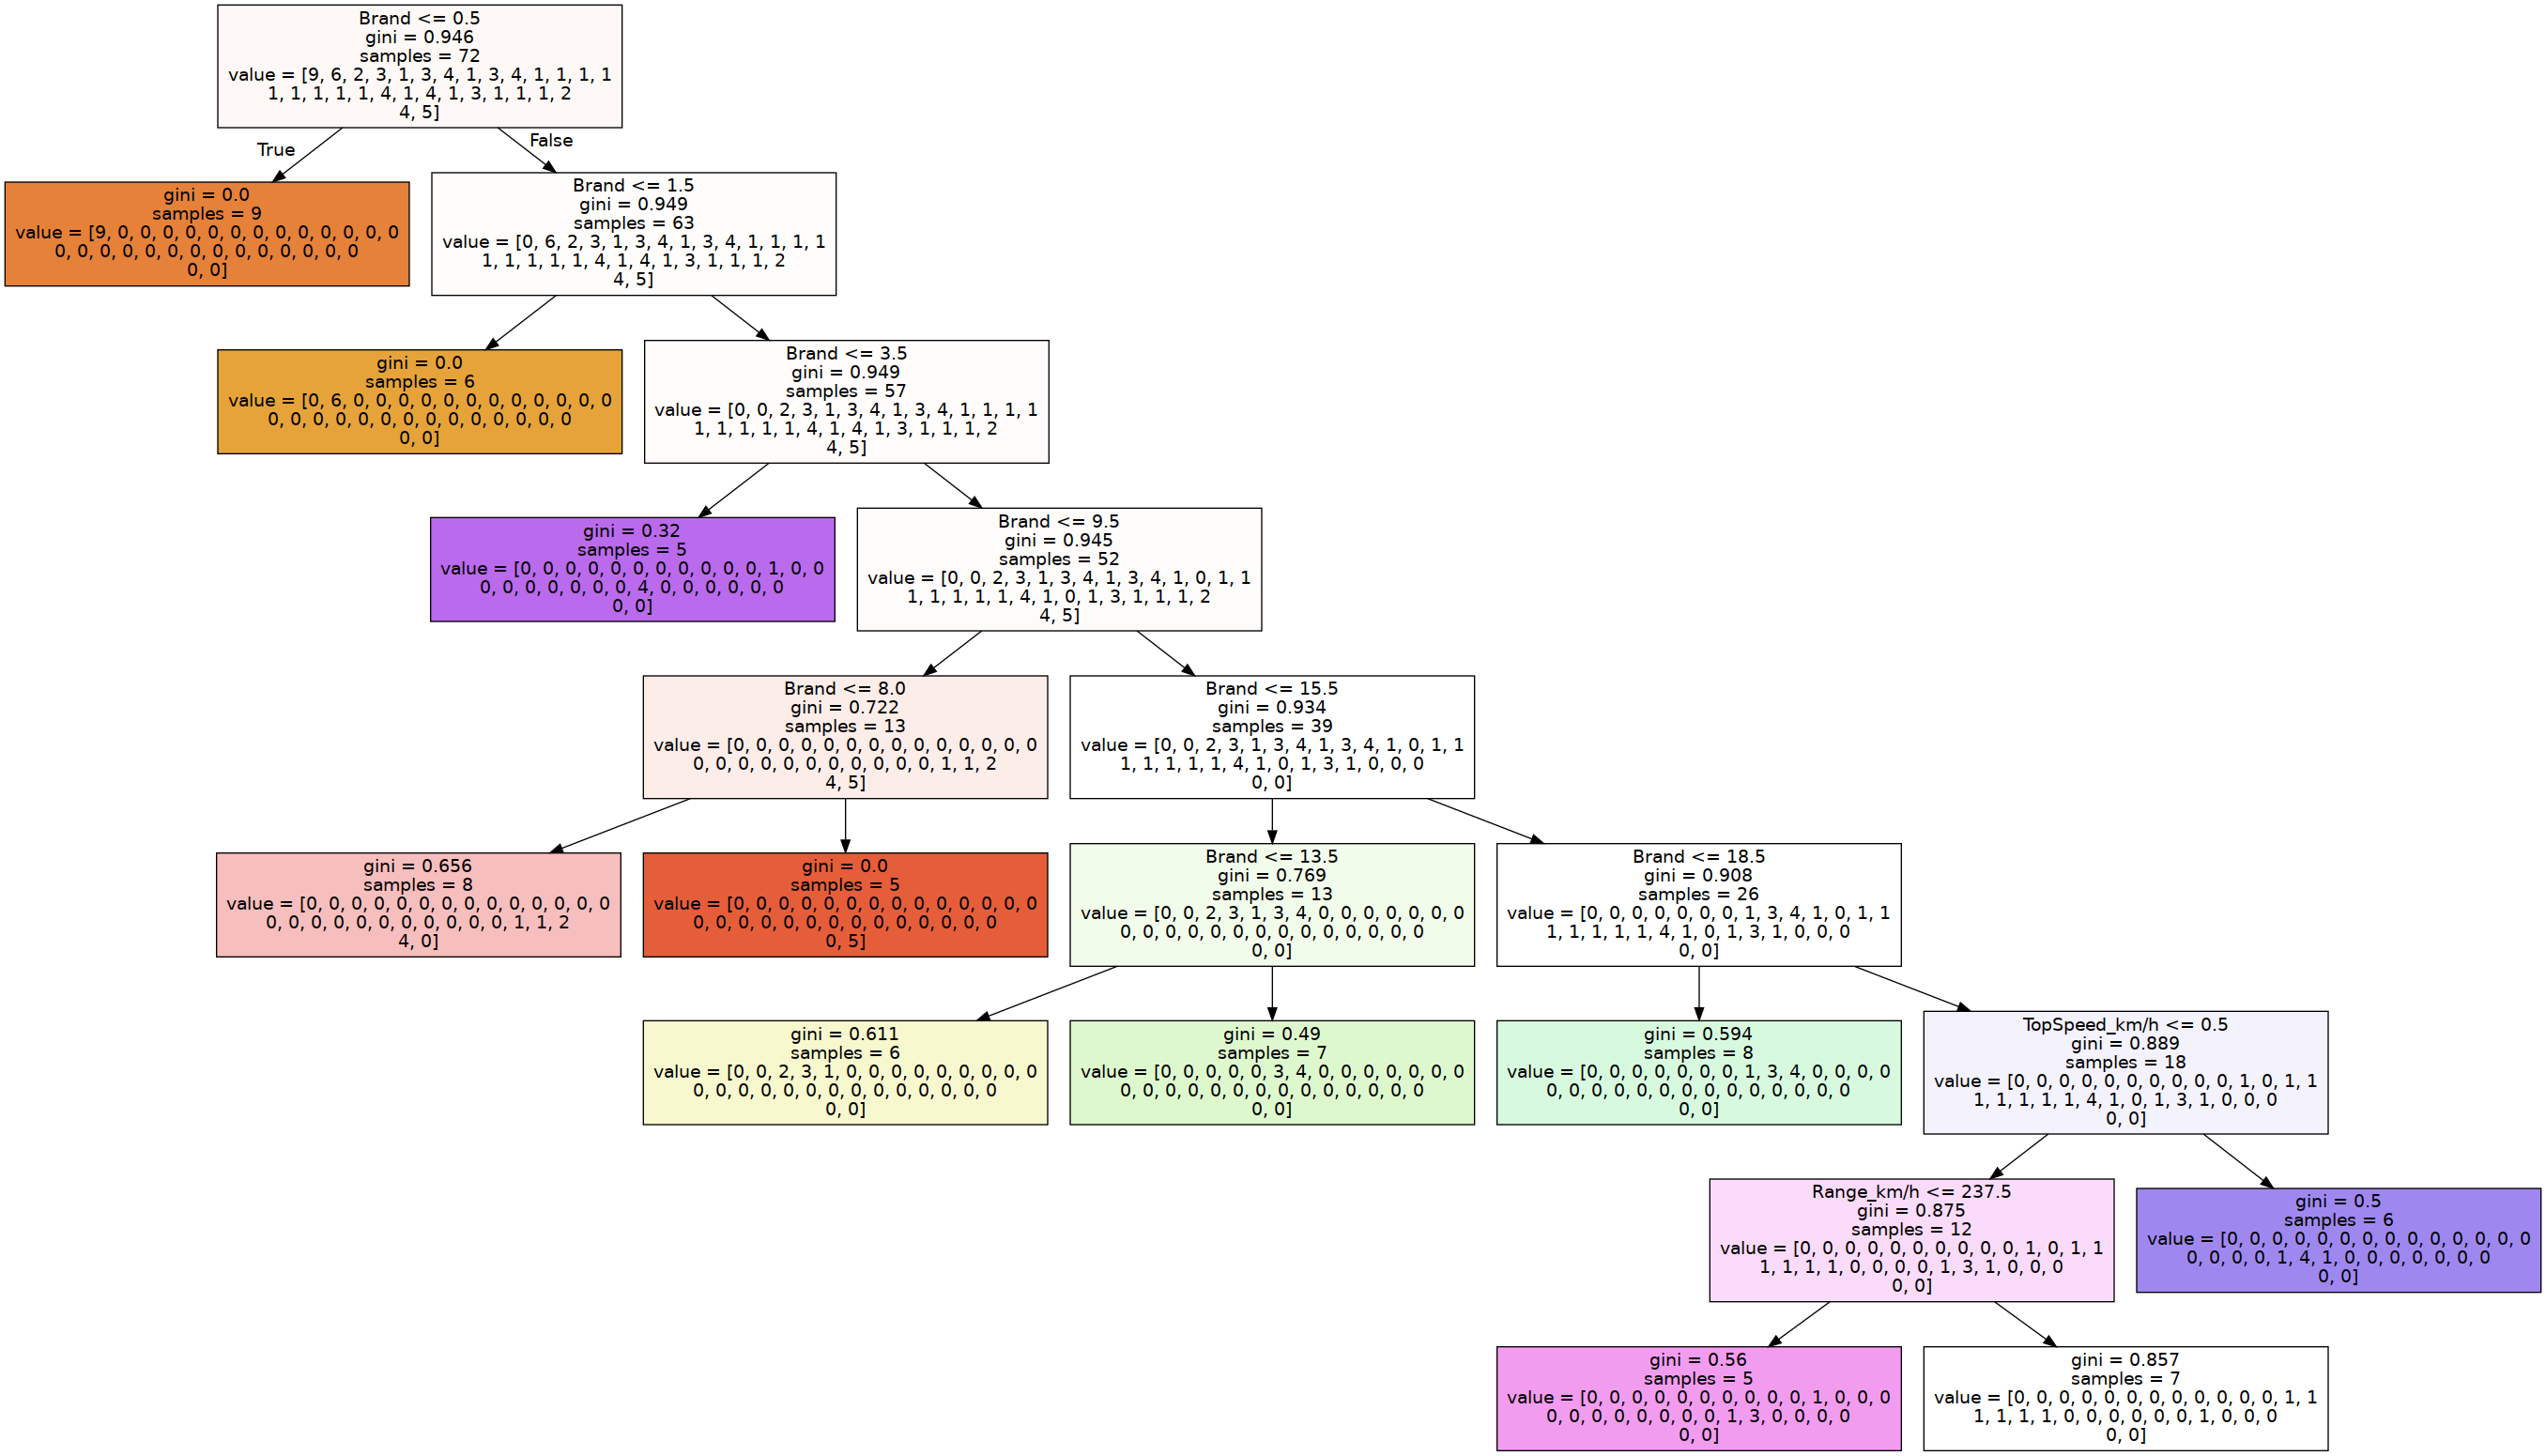

In [270]:
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [271]:
pd.DataFrame({'atributo':X.columns, 'importance':cv_clf.feature_importances_}).sort_values('importance', ascending = False)

,atributo,importance
0,Brand,0.888262
2,TopSpeed_km/h,0.066510
3,Range_km/h,0.045227
1,Accel_sec,0.000000
4,FastCharge,0.000000
5,BodyStyle,0.000000
6,Seats,0.000000
7,PriceEuro,0.000000


In [273]:
X_train.to_csv("/cars_train_X.csv", sep="\t", header=True, index = False)

X_test.to_csv("/cars_test_X.csv", sep="\t", header=True, index = False)

y_train.to_csv("/cars_train_y.csv", sep="\t", header=True, index = False)

y_test .to_csv("/cars_test_y.csv", sep="\t", header=True, index = False)